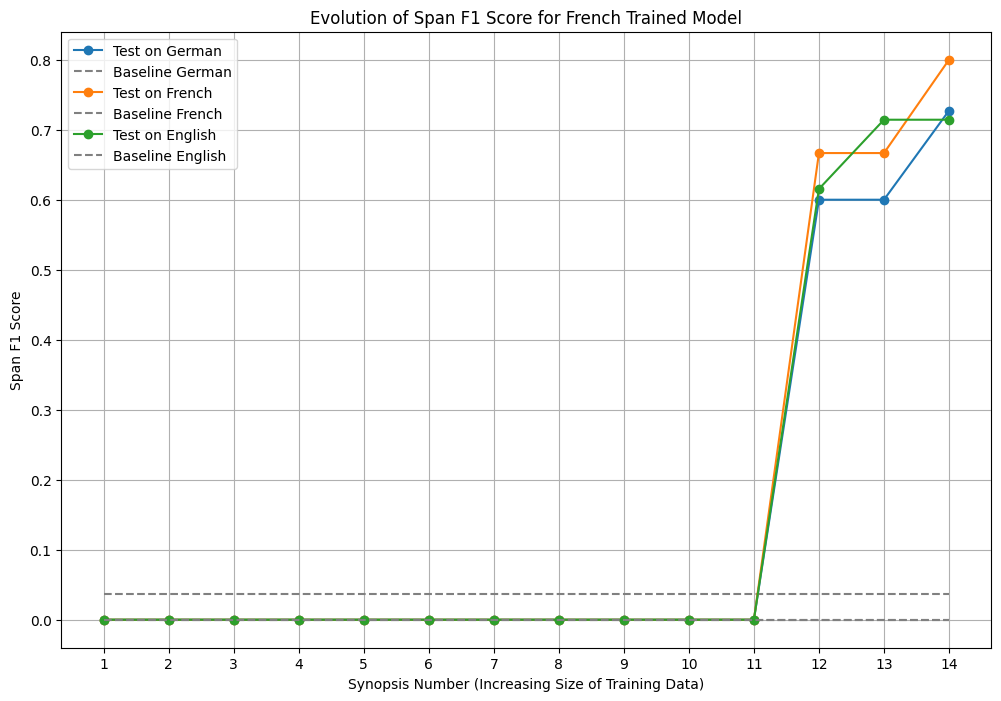

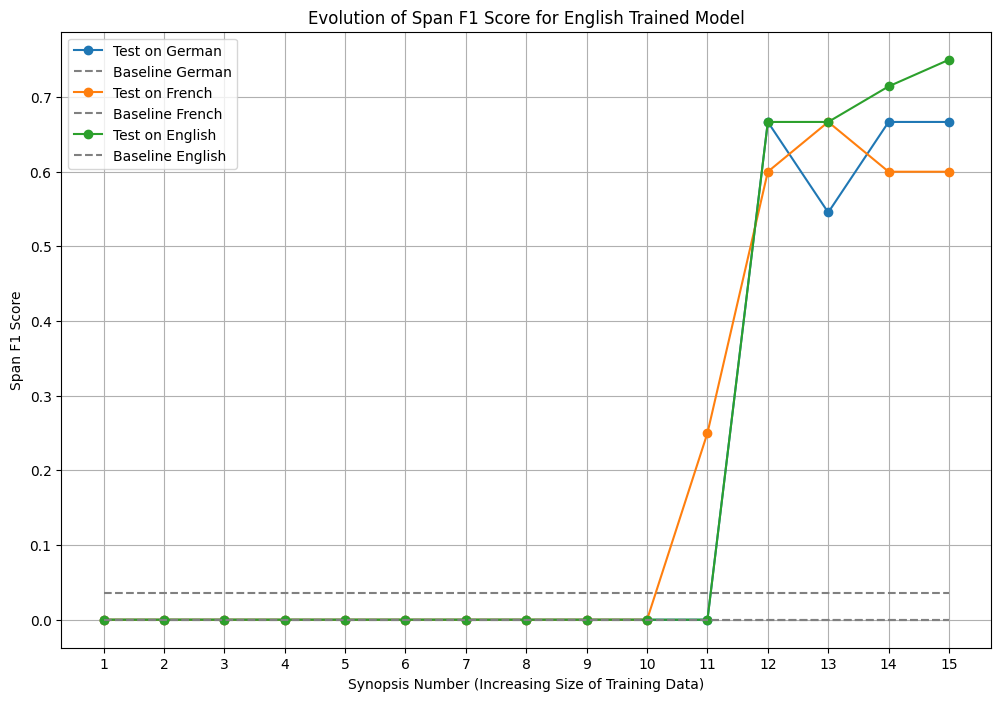

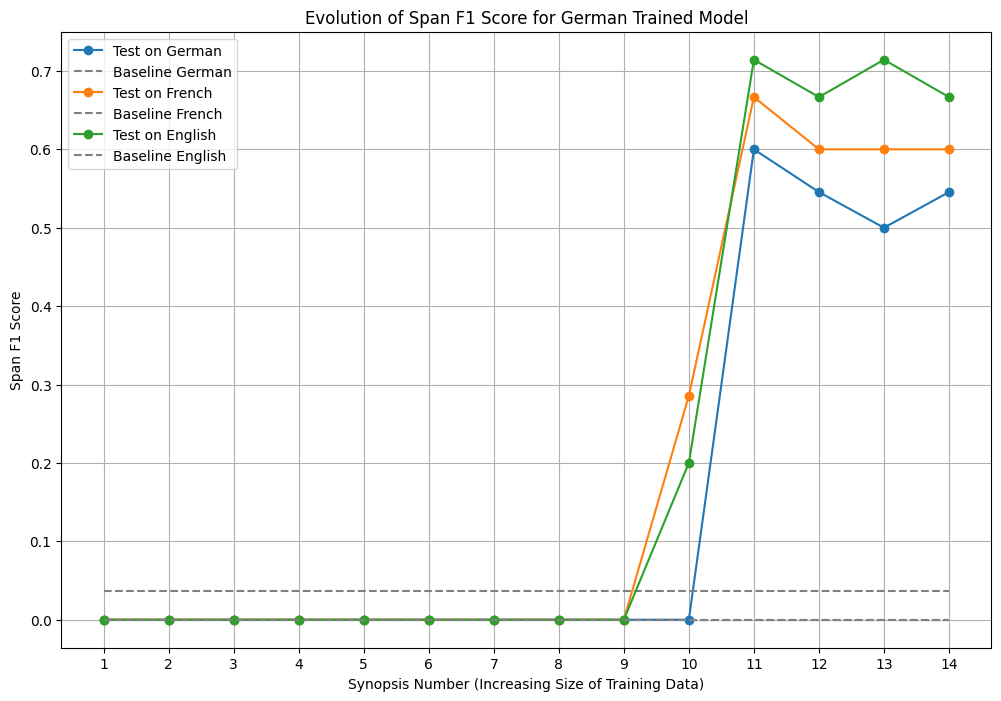

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\serru\OneDrive\Documents\GitHub\NLP2\src\results_before_random.tsv'
baseline_path = r'C:\Users\serru\OneDrive\Documents\GitHub\NLP2\src\results_baseline_before_random.tsv'

data = pd.read_csv(file_path, sep='\t')
baseline_data = pd.read_csv(baseline_path, sep='\t')

baseline_data['synopsis_number'] = 0

combined_data = pd.concat([data, baseline_data])

def plot_span_f1_for_language(train_language, combined_data):
    filtered_data = combined_data[combined_data['train_lang'] == train_language].copy()

    filtered_data.loc[:, 'synopsis_number'] = filtered_data['train_file'].apply(
        lambda x: int(x.split('_')[1].split('.')[0]) if pd.notnull(x) else 0
    )
    sorted_data = filtered_data.sort_values(by='synopsis_number')

    plt.figure(figsize=(12, 8))
    max_synopsis = sorted_data['synopsis_number'].max()

    for lang in ['german', 'french', 'english']:
        subset = sorted_data[sorted_data['test_lang'] == lang]
        plt.plot(subset['synopsis_number'], subset['span_f1'], marker='o', label=f'Test on {lang.capitalize()}')

        baseline_value = baseline_data[(baseline_data['test_lang'] == lang) & (baseline_data['train_lang'] == 'baseline')]['span_f1'].values[0]
        plt.hlines(baseline_value, 1, max_synopsis, colors='gray', linestyles='dashed', label=f'Baseline {lang.capitalize()}')

    plt.xlabel('Synopsis Number (Increasing Size of Training Data)')
    plt.ylabel('Span F1 Score')
    plt.title(f'Evolution of Span F1 Score for {train_language} Trained Model')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(1, max_synopsis + 1))
    plt.show()

for language in ['French', 'English', 'German']:
    plot_span_f1_for_language(language, combined_data)  
